# __Plots and Calculations for Muon Lifetime from REAL DATA__ 

In [1]:
import ROOT as root
import numpy as np
import scipy as scipy
import math as m

Welcome to JupyROOT 6.30/04


## Operating Voltage of 700V

The half life of muon is:  -1.9045980053359022 micro seconds
The half life of muon is:  -2.1805404544241167 micro seconds
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      73.3747
NDf                       =           51
Edm                       =   1.2138e-07
NCalls                    =          372
p0                        =      342.094   +/-   12.3122     
p1                        = -0.000525045   +/-   1.59475e-05 
p2                        =      1.92548   +/-   0.300738    
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      47.9841
NDf                       =           51
Edm                       =  9.81206e-07
NCalls                    =           64
p0                        =      281.901   +/-   10.2137     
p1                        = -0.000458602   +/-   1.40479e-05 
p2                        =      1.18628   +/-   0.281764    


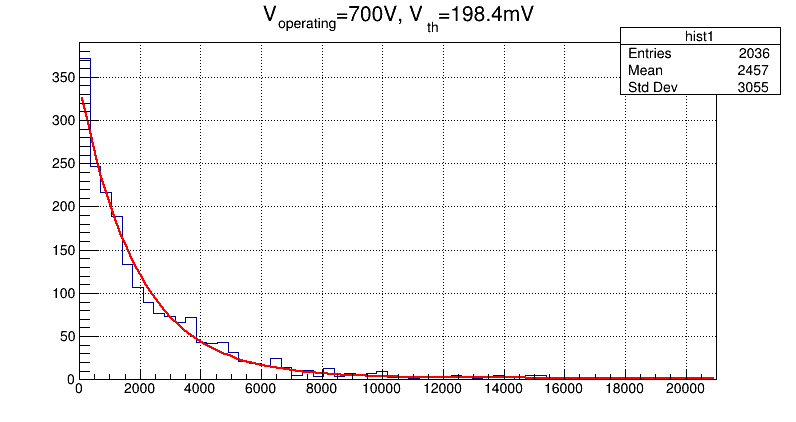

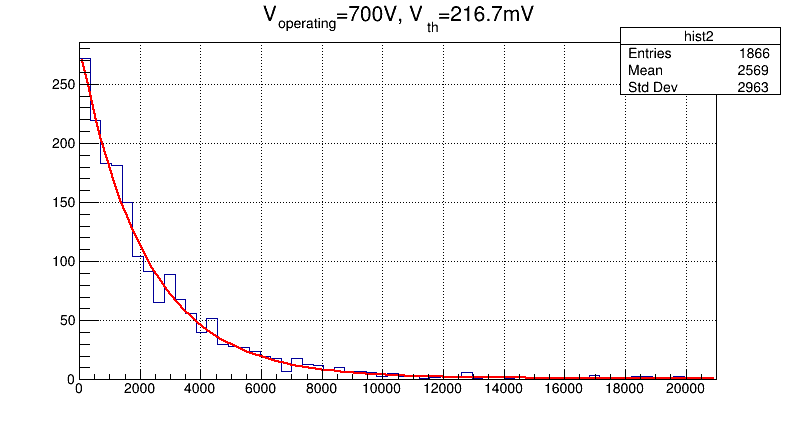

In [ ]:
'''
Loading the Data from file
'''
data_650_1 = np.loadtxt('/home/apmnair18/Github/Calculation_of_muon_life_in_Geant4/Data_and_Plots/Real_Data/650_196.5.data')
data_650_2 = np.loadtxt('/home/apmnair18/Github/Calculation_of_muon_life_in_Geant4/Data_and_Plots/Real_Data/650_216.7.data')
data_700_1 = np.loadtxt('/home/apmnair18/Github/Calculation_of_muon_life_in_Geant4/Data_and_Plots/Real_Data/700_198.4.data')
data_700_2 = np.loadtxt('/home/apmnair18/Github/Calculation_of_muon_life_in_Geant4/Data_and_Plots/Real_Data/700_216.7.data')
data_750_1 = np.loadtxt('/home/apmnair18/Github/Calculation_of_muon_life_in_Geant4/Data_and_Plots/Real_Data/750_196.5.data')
data_750_2 = np.loadtxt('/home/apmnair18/Github/Calculation_of_muon_life_in_Geant4/Data_and_Plots/Real_Data/750_216.7.data')
# list1 = data_700_1[:,0].tolist()
# list2 = data_700_2[:,0].tolist()
# ilist1 = [value for value in list1 if value < 40000]
# ilist2 = [value for value in list2 if value < 40000]
# del list1,list2

# '''
# Creating canvas and histogram
# '''
# hist1,canvas1,hist2,canvas2 = None,None,None,None
# hist1 = root.TH1F("hist1", r' V_{operating}=700V, V_{th}=198.4mV',60, 0, 21000)
# hist2 = root.TH1F("hist2", r' V_{operating}=700V, V_{th}=216.7mV',60, 0, 21000)
# canvas1 = root.TCanvas("canvas1", "Histogram Canvas",800, 450)
# canvas2 = root.TCanvas("canvas2", "Histogram Canvas",800, 450)


# for value1 in ilist1:
#     hist1.Fill(value1)
# for value2 in ilist2:
#     hist2.Fill(value2)
# del ilist1,ilist2
# '''
# fitting the histogram
# '''    
# exp_fit= root.TF1("exp_fit", "[0]*exp(x*[1]) + [2]")
# hist1.Fit(exp_fit)

# print("The half life of muon is: ", (1/(exp_fit.GetParameter(1)*10**9))*10**6, "micro seconds")


# hist2.Fit(exp_fit)

# print("The half life of muon is: ", (1/(exp_fit.GetParameter(1)*10**9))*10**6, "micro seconds")



# '''
# Plotting the histograms
# '''
# canvas1.cd()
# hist1.Draw()
# canvas1.Draw()
# canvas1.SetGrid()


# canvas2.SetGrid()


# canvas2.cd()
# hist2.Draw()
# canvas2.Draw()




## Operating Voltage of 750V

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      3378.11
NDf                       =           53
Edm                       =  1.83799e-15
NCalls                    =           52
p0                        =      2.65977   +/-   0.0016054   
p1                        =            0   +/-   5.82523e-14 
p2                        =      2.65977   +/-   7.17419e-05 


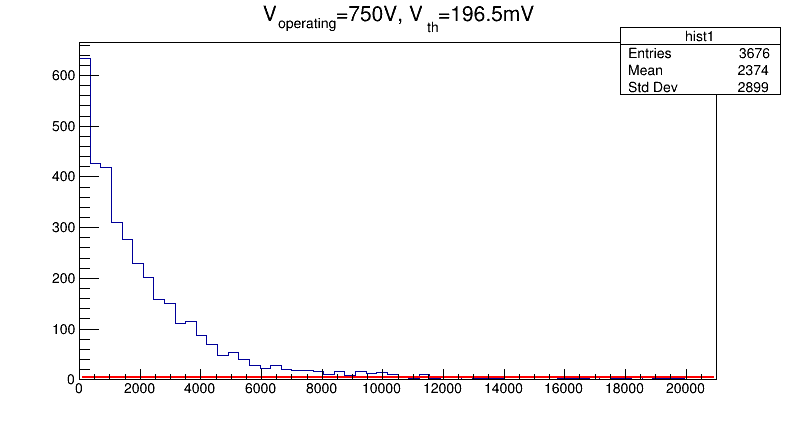

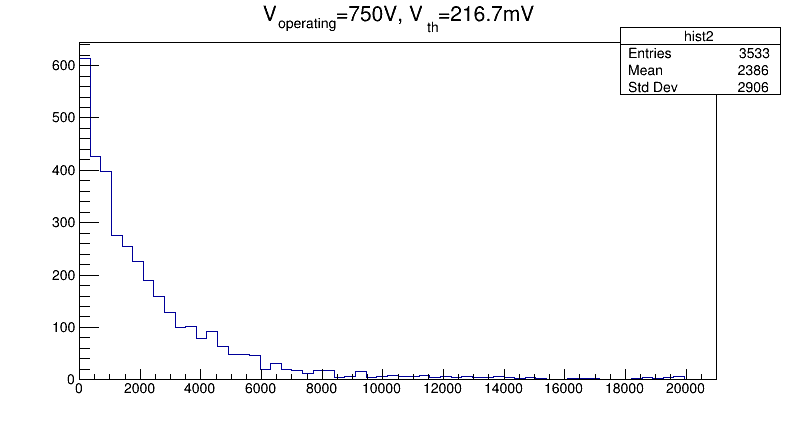

In [114]:
del hist1,hist2
'''
Loading the Data from file
'''
data_750_1 = np.loadtxt('/home/apmnair18/Github/Calculation_of_muon_life_in_Geant4/Data_and_Plots/Real_Data/750_196.5.data')
data_750_2 = np.loadtxt('/home/apmnair18/Github/Calculation_of_muon_life_in_Geant4/Data_and_Plots/Real_Data/750_216.7.data')
list1 = data_750_1[:,0].tolist()
list2 = data_750_2[:,0].tolist()
ilist1 = [value for value in list1 if value < 40000]
ilist2 = [value for value in list2 if value < 40000]
del list1,list2



'''
Creating canvas and histogram
'''
hist1,canvas1,hist2,canvas2 = None,None,None,None
hist1 = root.TH1F("hist1", r' V_{operating}=750V, V_{th}=196.5mV',60, 0, 21000)
hist2 = root.TH1F("hist2", r' V_{operating}=750V, V_{th}=216.7mV',60, 0, 21000)
canvas1 = root.TCanvas("canvas1", "Histogram Canvas",800, 450)
canvas2 = root.TCanvas("canvas2", "Histogram Canvas",800,450)
for value1 in ilist1:
    hist1.Fill(value1)
for value2 in ilist2:
    hist2.Fill(value2)
del ilist1,ilist2    

'''
fitting the histogram
'''    
exp_fit= root.TF1("exp_fit_1", "[0]*exp(x*[1]) + [2]")
hist1.Fit(exp_fit)

# print("The half life of muon is: ", (1/(exp_fit.GetParameter(1)*10**9))*10**6, "micro seconds")


# hist2.Fit(exp_fit)

# print("The half life of muon is: ", (1/(exp_fit.GetParameter(1)*10**9))*10**6, "micro seconds")



'''
Plotting the histogram
'''
canvas1.cd()
hist1.Draw()
canvas1.Draw()


canvas2.cd()
hist2.Draw()
canvas2.Draw()
